In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import datetime 
color = sns.color_palette()
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 

In [2]:
# Importing the dataset
fd = pd.read_excel('C:\\Users\\rishi\\Desktop\\Fall 2018\\ML in Finance\\forex.xlsx')
ads = pd.read_excel('C:\\Users\\rishi\\Desktop\\Fall 2018\\ML in Finance\\Professor\\Lecture_5\\ads_all_vintages-zip(1)\\ads.xlsx')

In [3]:
fd.head()

,observation_date,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
0,2015-01-01,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2,2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
3,2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
4,2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697


In [4]:
ads.head()

,ADS_dates,ADS_Index_111618
0,2015-01-01,-0.223363
1,2015-01-02,-0.234620
2,2015-01-03,-0.245410
3,2015-01-04,-0.255736
4,2015-01-05,-0.265741


In [5]:
ads.shape

(1346, 2)

In [6]:
for i in range(0, len(ads)):
    if i % 7 == 2 or i % 7 == 3:
        ads.drop([i], inplace = True)

In [7]:
ads.head()

,ADS_dates,ADS_Index_111618
0,2015-01-01,-0.223363
1,2015-01-02,-0.234620
4,2015-01-05,-0.265741
5,2015-01-06,-0.275249
6,2015-01-07,-0.284261


In [8]:
ads.shape

(962, 2)

In [9]:
fd.shape

(962, 6)

In [10]:
fd = fd.set_index(pd.DatetimeIndex(fd['observation_date']))
del fd['observation_date']

In [11]:
ads = ads.set_index(pd.DatetimeIndex(ads['ADS_dates']))
del ads['ADS_dates']

In [12]:
fd.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK
observation_date,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697


In [13]:
ads.head()

,ADS_Index_111618
ADS_dates,
2015-01-01,-0.223363
2015-01-02,-0.234620
2015-01-05,-0.265741
2015-01-06,-0.275249
2015-01-07,-0.284261


In [14]:
fd = fd.merge(ads, left_index=True, right_index=True)
fd.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618
observation_date,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,-0.223363
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261


# Checking for Null Values 

In [15]:
fd.isnull().sum()

DEXBZUS             37
DEXUSEU             37
DEXUSAL             31
DEXSZUS             31
DEXUSUK             31
ADS_Index_111618     0
dtype: int64

In [16]:
fd.dropna(inplace = True)

In [17]:
fd.isnull().sum()

DEXBZUS             0
DEXUSEU             0
DEXUSAL             0
DEXSZUS             0
DEXUSUK             0
ADS_Index_111618    0
dtype: int64

# PCA

In [18]:
from sklearn.preprocessing import StandardScaler
from math import sqrt
import numpy as np
normalise = StandardScaler().fit_transform(fd.values)
normalise

array([[-2.0918462 ,  1.45303421, -0.76178611,  1.5545308 , -0.48025235,
        -0.21732979],
       [-1.99445512,  1.25352947, -0.66019376,  1.38742547, -0.38395991,
        -0.31866654],
       [-2.07771374,  1.29055097, -0.64011155,  1.34961332, -0.39547314,
        -0.34962589],
       ..., 
       [ 2.39152289,  0.52955353,  0.4514156 , -1.29967704, -1.02974723,
         1.14163894],
       [ 2.40043249,  0.64061802,  0.54473881, -1.28138084, -1.01718734,
         1.08887269],
       [ 2.09474125,  0.54189403,  0.72311609, -1.46434288, -0.94706133,
         0.98916819]])

In [19]:
import numpy as np
mean_vec = np.mean(normalise, axis=0)
cov_mat = (normalise - mean_vec).T.dot((normalise - mean_vec)) / (normalise.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00111483 -0.0347709  -0.06008077  0.02922658  0.00370787 -0.06687308]
 [-0.0347709   1.00111483 -0.50418154 -0.13320191 -0.76986961  0.36842969]
 [-0.06008077 -0.50418154  1.00111483 -0.55919743  0.74919719 -0.05568945]
 [ 0.02922658 -0.13320191 -0.55919743  1.00111483  0.02338769 -0.51281972]
 [ 0.00370787 -0.76986961  0.74919719  0.02338769  1.00111483 -0.42845543]
 [-0.06687308  0.36842969 -0.05568945 -0.51281972 -0.42845543  1.00111483]]


In [20]:
cov_mat = np.cov(normalise.T)

eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues 
[ 2.52624212  1.74254784  0.9940842   0.05171524  0.21542861  0.47667095]


In [21]:
cor_mat_1 = np.corrcoef(normalise.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat_1)

print('Eigenvectors  \n%s' %eig_vecs)
print('\nEigenvalues  \n%s' %eig_vals)

Eigenvectors  
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues  
[ 2.52342894  1.74060736  0.9929772   0.05165765  0.21518872  0.47614014]


In [22]:
cor_mat_2 = np.corrcoef(normalise.T)

eig_valss, eig_vecss = np.linalg.eig(cor_mat_2)

print('Eigenvectors raw  \n%s' %eig_vecss)
print('\nEigenvalues raw  \n%s' %eig_valss)

Eigenvectors raw  
[[-0.00769442  0.11578311  0.99134049 -0.03218116 -0.05170208  0.0083888 ]
 [ 0.54193179 -0.10749279 -0.00673232  0.06734598 -0.58765729 -0.58722512]
 [-0.49386983 -0.43107993  0.01486233 -0.68288137 -0.22001185 -0.23517997]
 [ 0.0193086   0.71437894 -0.12328387 -0.42274044 -0.45576162  0.29607914]
 [-0.60364773  0.00429089 -0.01423843  0.59031208 -0.53382193  0.04420488]
 [ 0.31237784 -0.52806627  0.03970109 -0.03039902 -0.33301064  0.71426167]]

Eigenvalues raw  
[ 2.52342894  1.74060736  0.9929772   0.05165765  0.21518872  0.47614014]


In [23]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [24]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.52342893686
1.74060736024
0.992977201727
0.47614013843
0.215188715698
0.0516576470485


In [25]:
!pip install plotly

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [26]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.plotly.tools.set_credentials_file(username='dutta.r', api_key='y2fHU1NeFjgaJrn6xyHx')

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = Bar(
        x=['PC %s' %i for i in range(1,5)],
        y=var_exp,
        showlegend=False)

trace2 = Scatter(
        x=['PC %s' %i for i in range(1,5)], 
        y=cum_var_exp,
        name='cumulative explained variance')

data = Data([trace1, trace2])

layout=Layout(
        yaxis=YAxis(title='Explained variance in percent'),
        title='Explained variance by different principal components')

fig = Figure(data=data, layout=layout)
py.iplot(fig)

In [27]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1)))

print('Eigen Vector Matrix "W": \n', matrix_w)

Eigen Vector Matrix "W": 
 [[-0.00769442  0.11578311]
 [ 0.54193179 -0.10749279]
 [-0.49386983 -0.43107993]
 [ 0.0193086   0.71437894]
 [-0.60364773  0.00429089]
 [ 0.31237784 -0.52806627]]


In [28]:
Y = normalise.dot(matrix_w)
matrix_w

array([[-0.00769442,  0.11578311],
       [ 0.54193179, -0.10749279],
       [-0.49386983, -0.43107993],
       [ 0.0193086 ,  0.71437894],
       [-0.60364773,  0.00429089],
       [ 0.31237784, -0.52806627]])

In [29]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca= sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(normalise)
Y_sklearn.shape

(898, 3)

In [30]:
pca1=[]
for a in Y_sklearn:
    pca1.append(a[0])

In [31]:
pca2=[]
for a in Y_sklearn:
    pca2.append(a[1])

In [32]:
pca3=[]
for a in Y_sklearn:
    pca3.append(a[2])

In [33]:
data = fd
data['PC1'] = pca1
data['PC2'] = pca2
data['PC3'] = pca3

In [34]:
data.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3
observation_date,,,,,,,,,
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620,1.431794,-1.153227,-2.288275
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741,1.179745,-1.076704,-2.173667
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249,1.187079,-1.043714,-2.252559
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261,0.978661,-0.995910,-2.244967
2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645,-0.292778,0.986006,-1.091310,-2.371803


In [35]:
data.shape

(898, 9)

In [36]:
data['constant'] = np.ones((898,1), dtype=np.float64, order='C')

In [37]:
data.shape

(898, 10)

In [38]:
data.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2015-01-02,2.6967,1.2015,0.7379,1.2938,1.7404,-0.234620,1.431794,-1.153227,-2.288275,1.0
2015-01-05,2.7284,1.1918,0.7465,1.2801,1.7588,-0.265741,1.179745,-1.076704,-2.173667,1.0
2015-01-06,2.7013,1.1936,0.7482,1.2770,1.7566,-0.275249,1.187079,-1.043714,-2.252559,1.0
2015-01-07,2.7000,1.1820,0.7528,1.2695,1.7697,-0.284261,0.978661,-0.995910,-2.244967,1.0
2015-01-08,2.6635,1.1811,0.7517,1.2794,1.7645,-0.292778,0.986006,-1.091310,-2.371803,1.0


# DIVIDE the data into train and test set

In [39]:
train = data.iloc[:628,]
test = data.iloc[628:,]

In [40]:
train.shape

(628, 10)

In [41]:
test.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2017-07-31,3.1338,1.1826,0.9434,1.0484,1.9810,-0.297080,-0.869509,1.721507,-0.575298,1.0
2017-08-01,3.1143,1.1799,0.9415,1.0489,1.9806,-0.302087,-0.891770,1.699841,-0.636018,1.0
2017-08-02,3.1165,1.1861,0.9317,1.0480,1.9743,-0.307402,-0.751257,1.661705,-0.630761,1.0
2017-08-03,3.1209,1.1880,0.9299,1.0492,1.9606,-0.312548,-0.681354,1.636178,-0.619388,1.0
2017-08-04,3.1176,1.1754,0.9157,1.0548,1.9532,-0.317523,-0.719239,1.479998,-0.638699,1.0


# Bootstrap 3 times

In [42]:
bst_1 = train.sample(n=628, replace=True)
bst_1.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2016-04-04,3.5994,1.1386,0.8180,1.2194,1.9756,-0.530705,-0.819649,-1.071593,0.539901,1.0
2015-04-28,2.9002,1.0979,0.7564,1.2611,1.8011,-0.343663,-0.146061,-1.264375,-1.620334,1.0
2015-10-02,3.9712,1.1276,0.7442,1.2453,1.8873,-0.481667,-0.185565,-1.743367,1.634819,1.0
2016-07-01,3.2448,1.1145,0.8543,1.2152,2.0168,0.074144,-0.807588,0.261804,-0.448946,1.0
2015-12-04,3.7426,1.0884,0.7863,1.1911,1.9746,-0.715449,-1.389049,-1.465989,0.996175,1.0


In [43]:
bst_2 = train.sample(n=628, replace=True)
bst_2.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2017-03-28,3.1298,1.0852,0.9202,0.9932,2.0097,0.104662,-1.514735,2.560577,-0.445264,1.0
2016-10-19,3.1677,1.0966,0.8935,1.1718,2.0484,-0.295855,-1.720372,0.190536,-0.659329,1.0
2015-02-02,2.7086,1.1337,0.7542,1.2841,1.7781,-0.487805,0.201797,-1.576019,-2.260734,1.0
2016-10-25,3.1142,1.0890,0.9059,1.1671,2.0485,-0.296717,-1.878461,0.295381,-0.812094,1.0
2016-11-01,3.2342,1.1042,0.9186,1.1591,2.0818,-0.287249,-1.883419,0.436214,-0.435716,1.0


In [44]:
bst_3 = train.sample(n=628, replace=True)
bst_3.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2015-03-09,3.1015,1.0846,0.7319,1.3088,1.7359,-0.543296,-0.141980,-2.247586,-1.102379,1.0
2016-10-04,3.2339,1.1212,0.8883,1.1752,2.0392,-0.272427,-1.363709,0.205760,-0.463424,1.0
2016-07-11,3.3095,1.1045,0.8614,1.2044,2.0320,0.049836,-1.037288,0.304804,-0.237295,1.0
2015-07-21,3.1725,1.0927,0.7516,1.2435,1.8495,-0.052579,-0.043423,-0.744396,-0.730633,1.0
2015-03-19,3.2931,1.0621,0.7223,1.2911,1.7563,-0.519370,-0.385569,-2.219461,-0.489209,1.0


In [45]:
bst_4 = train.sample(n=628, replace=True)
bst_4.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2017-06-27,3.3195,1.1300,0.9573,1.0274,1.9873,-0.169061,-1.435916,2.012911,0.047665,1.0
2017-06-09,3.2793,1.1190,0.9448,1.0404,1.9543,-0.101075,-1.308184,1.943601,-0.083743,1.0
2017-03-24,3.1144,1.0806,0.9136,1.0088,1.9997,0.054064,-1.543339,2.299567,-0.521944,1.0
2016-11-17,3.4134,1.0656,0.8835,1.1163,2.0478,-0.225175,-1.952654,0.588828,0.184168,1.0
2017-04-28,3.1896,1.0895,0.9347,1.0329,1.9747,0.187768,-1.348367,2.420404,-0.307531,1.0


In [46]:
bst_5 = train.sample(n=628, replace=True)
bst_5.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2016-08-12,3.1648,1.1172,0.8384,1.2095,2.0000,-0.179778,-0.889387,-0.171304,-0.718767,1.0
2015-08-31,3.6206,1.1194,0.7645,1.2293,1.9042,-0.394499,-0.355601,-1.244486,0.605776,1.0
2016-07-08,3.2835,1.1038,0.8622,1.2074,2.0248,0.062389,-1.012923,0.312185,-0.318597,1.0
2015-03-17,3.2632,1.0605,0.7350,1.2931,1.7552,-0.526664,-0.480262,-2.177633,-0.581692,1.0
2015-07-01,3.1269,1.1084,0.7423,1.2247,1.8491,-0.221690,0.011733,-0.867779,-0.866883,1.0


In [47]:
bst_6 = train.sample(n=628, replace=True)
bst_6.head()

,DEXBZUS,DEXUSEU,DEXUSAL,DEXSZUS,DEXUSUK,ADS_Index_111618,PC1,PC2,PC3,constant
observation_date,,,,,,,,,,
2015-11-10,3.7978,1.0686,0.7688,1.2421,1.9067,-0.721041,-1.288128,-2.071000,1.091610,1.0
2016-08-29,3.2436,1.1182,0.8190,1.1986,2.0182,-0.216503,-0.864339,-0.264494,-0.472026,1.0
2017-07-20,3.1374,1.1634,0.9749,1.0207,1.9979,-0.244858,-1.274170,2.168969,-0.508999,1.0
2016-10-03,3.2333,1.1210,0.8882,1.1791,2.0369,-0.268717,-1.353383,0.177468,-0.470455,1.0
2016-02-11,3.9704,1.1362,0.7726,1.2532,1.9474,-0.416131,-0.376717,-1.536947,1.628292,1.0


In [48]:
from numpy.linalg import inv

# Training Function

In [49]:
def train_test(train_data, test_data):
    y_train = train_data.iloc[:, 4] #DEXUSUK
    y_train = pd.DataFrame(y_train)
    y_train = np.matrix(y_train)
    #Y = alpha*beta X
    x_train1 = train_data.iloc[:, [9,1,2,3]]
    x_train1 = pd.DataFrame(x_train1)
    x_train1 = np.matrix(x_train1)
    beta_hat1 = (inv((x_train1.T)*x_train1))*(x_train1.T)*(y_train)
    beta_hat1 = np.matrix(beta_hat1)
    x_test1 = pd.DataFrame(test_data.iloc[:, [9,1,2,3]])
    x_test1 = np.matrix(x_test1)
    y_hat1 = (x_test1*beta_hat1)
    #Yt = alpha + beta*ADS
    x_train2 = train_data.iloc[:, [9,5]]
    x_train2 = pd.DataFrame(x_train2)
    x_train2 = np.matrix(x_train2)
    beta_hat2 = (inv((x_train2.T)*x_train2))*(x_train2.T)*(y_train)
    beta_hat2 = np.matrix(beta_hat2)
    x_test2 = pd.DataFrame(test_data.iloc[:, [9,5]])
    x_test2 = np.matrix(x_test2)
    y_hat2 = (x_test2*beta_hat2)
    #Yt = alpha + beta1*PC1 + beta2*PC2 + beat*PC3
    x_train3 = train_data.iloc[:, [9,6,7,8]]
    x_train3 = pd.DataFrame(x_train3)
    x_train3 = np.matrix(x_train3)
    beta_hat3 = (inv((x_train3.T)*x_train3))*(x_train3.T)*(y_train)
    beta_hat3 = np.matrix(beta_hat3)
    x_test3 = pd.DataFrame(test_data.iloc[:, [9,6,7,8]])
    x_test3 = np.matrix(x_test3)
    y_hat3 = (x_test3*beta_hat3)
    #Yt = alpha + beta1*PC1 + beta2*ADS
    x_train4 = train_data.iloc[:, [9,6,5]]
    x_train4 = pd.DataFrame(x_train4)
    x_train4 = np.matrix(x_train4)
    beta_hat4 = (inv((x_train4.T)*x_train4))*(x_train4.T)*(y_train)
    beta_hat4 = np.matrix(beta_hat4)
    x_test4 = pd.DataFrame(test_data.iloc[:, [9,6,5]])
    x_test4 = np.matrix(x_test4)                                       
    y_hat4 = (x_test4*beta_hat4)
    mse1 = cal_rmse(test_data.iloc[:,[9,1,2,3]], test_data.iloc[:, 4], beta_hat1)
    mse2 = cal_rmse(test_data.iloc[:, [9,5]], test_data.iloc[:, 4], beta_hat2)
    mse3 = cal_rmse(test_data.iloc[:, [9,6,7,8]], test_data.iloc[:, 4], beta_hat3)
    mse4 = cal_rmse(test_data.iloc[:, [9,6,5]], test_data.iloc[:, 4], beta_hat4)
    rmse_y_hat_list = {mse1:y_hat1, mse2:y_hat2, mse3:y_hat3, mse4:y_hat4}
    return rmse_y_hat_list

# RMSE Function

In [50]:
def cal_rmse(x_test, y_test, beta_hat):
    x_test = np.matrix(x_test)
    y_test = np.matrix(y_test)
    reg = (x_test*beta_hat)
    mse = (np.square(reg - y_test)).mean()
    rmse = np.sqrt(mse)
    return rmse

# Calculating Error term and adding it in the X

In [ ]:
    y_train = train_data.iloc[:, 4] #DEXUSUK
    y_train = pd.DataFrame(y_train)
    y_train = np.matrix(y_train)
    #Y = alpha*beta X
    x_train1 = train_data.iloc[:, [9,1,2,3]]
    x_train1 = pd.DataFrame(x_train1)
    x_train1 = np.matrix(x_train1)
    
    beta_hat1 = (inv((x_train1.T)*x_train1))*(x_train1.T)*(y_train)
    beta_hat1 = np.matrix(beta_hat1)
    x_test1 = pd.DataFrame(test_data.iloc[:, [9,1,2,3]])
    x_test1 = np.matrix(x_test1)
    y_hat1 = (x_test1*beta_hat1)
    
    #error term
    #choose test UK values
    y_test1 = pd.DataFrame(test_data.iloc[:, [4]])
    y_test1 = np.matrix(y_test1)
    #original UK values - y_test_hat values
    ut1 = (y_test1 - y_hat1)
    #attach error term to x_train
    x_train1 = x_train1.append(ut1)
    x_train1 = pd.DataFrame(x_train1)
    x_train1 = np.matrix(x_train1)
    #new beat_hat
    beta_hat1 = (inv((x_train1.T)*x_train1))*(x_train1.T)*(y_train)
    beta_hat1 = np.matrix(beta_hat1)
    #append error term to x_train
    x_test1 = x_test1.append(ut)
    x_test1 = np.matrix(x_test1)
    x_test1 = np.matrix(x_test1)
    y_hat1 = (x_test1*beta_hat1)
    

In [85]:
y_hat1

NameError: name 'y_hat1' is not defined

# LOWEST RMSE Function

In [51]:
def lowest_RMSE(rmse_y_hat_list):
    rmse_sorted =  sorted(rmse_y_hat_list.keys())
    lowest_rmse =  rmse_sorted[0]
    return lowest_rmse

# Calling the Training function on Bootstrap sample 1

In [52]:
rmse_y_hat_dic_1 = train_test(bst_1, test)
#rmse_y_hat_dic_1

# Calling the Lowest RMSE Function on BootStrap Sample 1

In [53]:
lowest_rmse_bst1 = lowest_RMSE(rmse_y_hat_dic_1)
lowest_rmse_bst1

0.20149103534019344

In [54]:
lowest_Y_hat_bst1 = rmse_y_hat_dic_1[lowest_rmse_bst1]
lowest_Y_hat_bst1 = pd.DataFrame(lowest_Y_hat_bst1)
lowest_Y_hat_bst1.shape

(270, 1)

# Calling the Training function on Bootstrap sample 2

In [55]:
rmse_y_hat_dic_2 = train_test(bst_2, test)
#rmse_y_hat_dic_2

In [56]:
lowest_rmse_bst2 = lowest_RMSE(rmse_y_hat_dic_2)
lowest_rmse_bst2

0.20121196092463225

In [57]:
lowest_Y_hat_bst2 = rmse_y_hat_dic_2[lowest_rmse_bst2]
lowest_Y_hat_bst2 = pd.DataFrame(lowest_Y_hat_bst2)
lowest_Y_hat_bst2.head()

,0
0,1.930379
1,1.932233
2,1.917992
3,1.910736
4,1.914134


# Calling the Training function on Bootstrap sample 3

In [58]:
rmse_y_hat_dic_3 = train_test(bst_3, test)
#rmse_y_hat_dic_3

In [59]:
lowest_rmse_bst3 = lowest_RMSE(rmse_y_hat_dic_3)
lowest_rmse_bst3

0.20392866405983576

In [60]:
lowest_Y_hat_bst3 = rmse_y_hat_dic_3[lowest_rmse_bst3]
lowest_Y_hat_bst3 = pd.DataFrame(lowest_Y_hat_bst3)
lowest_Y_hat_bst3.head()

,0
0,1.933312
1,1.935107
2,1.921140
3,1.914013
4,1.917320


# Calling the Training function on Bootstrap sample 4

In [61]:
rmse_y_hat_dic_4 = train_test(bst_4, test)
#rmse_y_hat_dic_4

In [62]:
lowest_rmse_bst4 = lowest_RMSE(rmse_y_hat_dic_4)
lowest_rmse_bst4

0.20374626463527853

In [63]:
lowest_Y_hat_bst4 = rmse_y_hat_dic_4[lowest_rmse_bst4]
lowest_Y_hat_bst4 = pd.DataFrame(lowest_Y_hat_bst4)
lowest_Y_hat_bst4.head()

,0
0,1.935026
1,1.936856
2,1.922436
3,1.915068
4,1.918457


# Calling the Training function on Bootstrap sample 5

In [64]:
rmse_y_hat_dic_5 = train_test(bst_5, test)
#rmse_y_hat_dic_5

In [65]:
lowest_rmse_bst5 = lowest_RMSE(rmse_y_hat_dic_5)
lowest_rmse_bst5

0.20400249120490455

In [66]:
lowest_Y_hat_bst5 = rmse_y_hat_dic_5[lowest_rmse_bst5]
lowest_Y_hat_bst5 = pd.DataFrame(lowest_Y_hat_bst5)
lowest_Y_hat_bst5.head()

,0
0,1.935421
1,1.937248
2,1.922795
3,1.915406
4,1.918796


# Calling the Training function on Bootstrap sample 6

In [67]:
rmse_y_hat_dic_6 = train_test(bst_6, test)
#rmse_y_hat_dic_6

In [68]:
lowest_rmse_bst6 = lowest_RMSE(rmse_y_hat_dic_6)
lowest_rmse_bst6

0.20384103447211724

In [69]:
lowest_Y_hat_bst6 = rmse_y_hat_dic_6[lowest_rmse_bst6]
lowest_Y_hat_bst6 = pd.DataFrame(lowest_Y_hat_bst6)
lowest_Y_hat_bst6.head()

,0
0,1.933359
1,1.935158
2,1.921313
3,1.914256
4,1.917557


# Converting lowest rmse valued Y_hat into matrix

In [70]:
lowest_Y_hat_bst1 = np.matrix(lowest_Y_hat_bst1)
lowest_Y_hat_bst2 = np.matrix(lowest_Y_hat_bst2)
lowest_Y_hat_bst3 = np.matrix(lowest_Y_hat_bst3)
lowest_Y_hat_bst4 = np.matrix(lowest_Y_hat_bst4)
lowest_Y_hat_bst5 = np.matrix(lowest_Y_hat_bst5)
lowest_Y_hat_bst6 = np.matrix(lowest_Y_hat_bst6)

# Calculating th Average of all the lowest rmse valued Y_hat's:

In [71]:
lowest_Y_hat_bst_avg = (lowest_Y_hat_bst1 + lowest_Y_hat_bst2 + lowest_Y_hat_bst3 + lowest_Y_hat_bst4 + lowest_Y_hat_bst5 + lowest_Y_hat_bst6)/6


In [72]:
lowest_Y_hat_bst_avg = pd.DataFrame(lowest_Y_hat_bst_avg)
lowest_Y_hat_bst_avg.tail()

,0
265,1.773604
266,1.767003
267,1.783987
268,1.783769
269,1.802862


In [73]:
lowest_Y_hat_bst_avg['dates'] = test.index

In [74]:
lowest_Y_hat_bst_avg.columns = ['rf_y_hat', 'dates']

In [75]:
lowest_Y_hat_bst_avg.tail()

,rf_y_hat,dates
265,1.773604,2018-08-30
266,1.767003,2018-08-31
267,1.783987,2018-09-04
268,1.783769,2018-09-05
269,1.802862,2018-09-07


In [76]:

lowest_Y_hat_bst_avg = lowest_Y_hat_bst_avg.set_index(pd.DatetimeIndex(lowest_Y_hat_bst_avg['dates']))
del lowest_Y_hat_bst_avg['dates']

In [77]:
lowest_Y_hat_bst_avg.tail()

,rf_y_hat
dates,
2018-08-30,1.773604
2018-08-31,1.767003
2018-09-04,1.783987
2018-09-05,1.783769
2018-09-07,1.802862


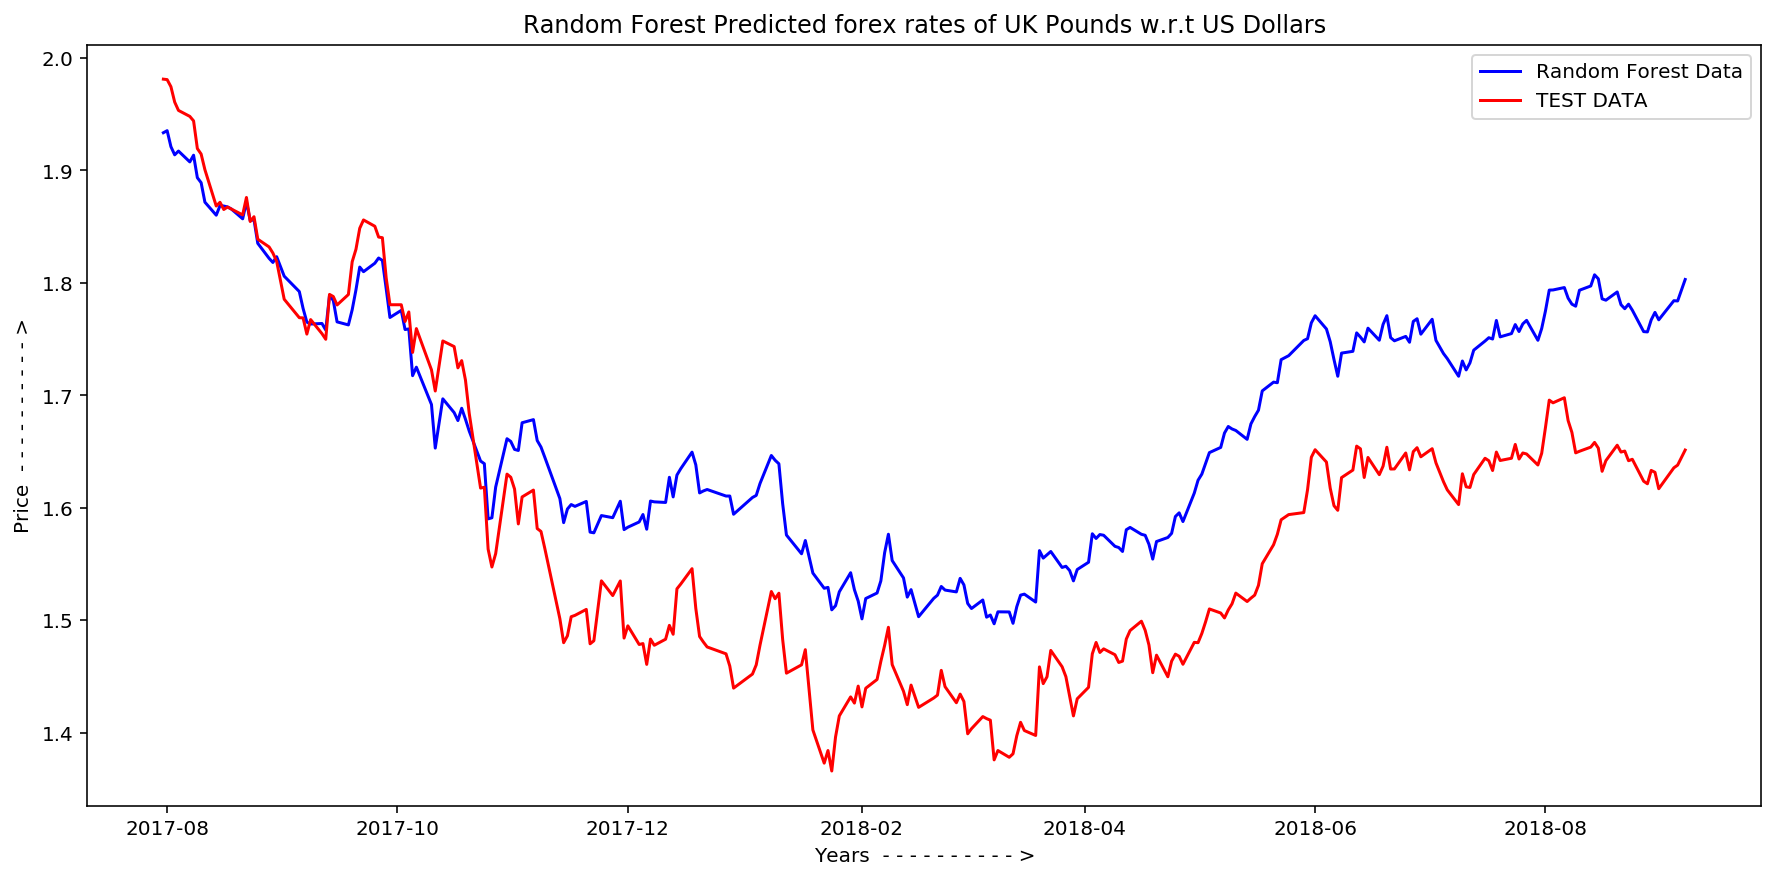

In [78]:
fig = plt.figure(figsize=(15,7))
plt.plot(lowest_Y_hat_bst_avg['rf_y_hat'], label = 'Random Forest Data', color = 'blue')
plt.plot(test['DEXUSUK'], label = 'TEST DATA', color = 'red')
plt.title('Random Forest Predicted forex rates of UK Pounds w.r.t US Dollars')
plt.xlabel('Years  - - - - - - - - - - >')
plt.ylabel('Price  - - - - - - - - - - >')
plt.legend()
plt.show()

#### Analysis : We observe that <font color = 'green'>Random Forest</font> takes care of the volatie property of our actual data and generates a smoother and more stable curve. This will help when trading methods like bolingr bands are applied to it. 

## Regression1: Y = United Kingdom            and               X = Europe, Australia and Switzerland



## <font color ='RED'>BootStrap Sample 1 = bst_1</font>



#### Y = alpha + beta*X

## Regression2:
#### Yt = alpha + beta*ADS

## Regression3:
#### Yt = alpha + beta1*PC1 + beta2*PC2 + beat*PC3

## Regression4:
#### Yt = alpha + beta1*PC1 + beta2*ADS

# For bootstrap sample 1 (BST_1) 

## The regression 3 (Y_hat3) has the lowest RMSE value = 0.201 

## ## Regression1: Y = United Kingdom            and               X = Europe, Australia and Switzerland

## <font color ='RED'>BootStrap Sample 2 = bst_2</font>

### Y = alpha * beta X

# Bollinger Bands

In [79]:
short_MA = lowest_Y_hat_bst_avg['rf_y_hat'].rolling(window=5).mean()
lowest_Y_hat_bst_avg['Short_Moving_Avg'] = short_MA

In [80]:
long_MA = lowest_Y_hat_bst_avg['rf_y_hat'].rolling(window=20).mean()
lowest_Y_hat_bst_avg['Long_Moving_Avg'] = long_MA

In [81]:
long_std= lowest_Y_hat_bst_avg['rf_y_hat'].rolling(window=20).std()
lowest_Y_hat_bst_avg['Long_std'] = long_std

In [82]:
long_upper_band = (long_MA) + ((long_std)*1)
lowest_Y_hat_bst_avg['Long_Upper_Band'] = long_upper_band

In [83]:
long_lower_band = (long_MA) - ((long_std)*1)
lowest_Y_hat_bst_avg['Long_Lower_Band'] = long_lower_band

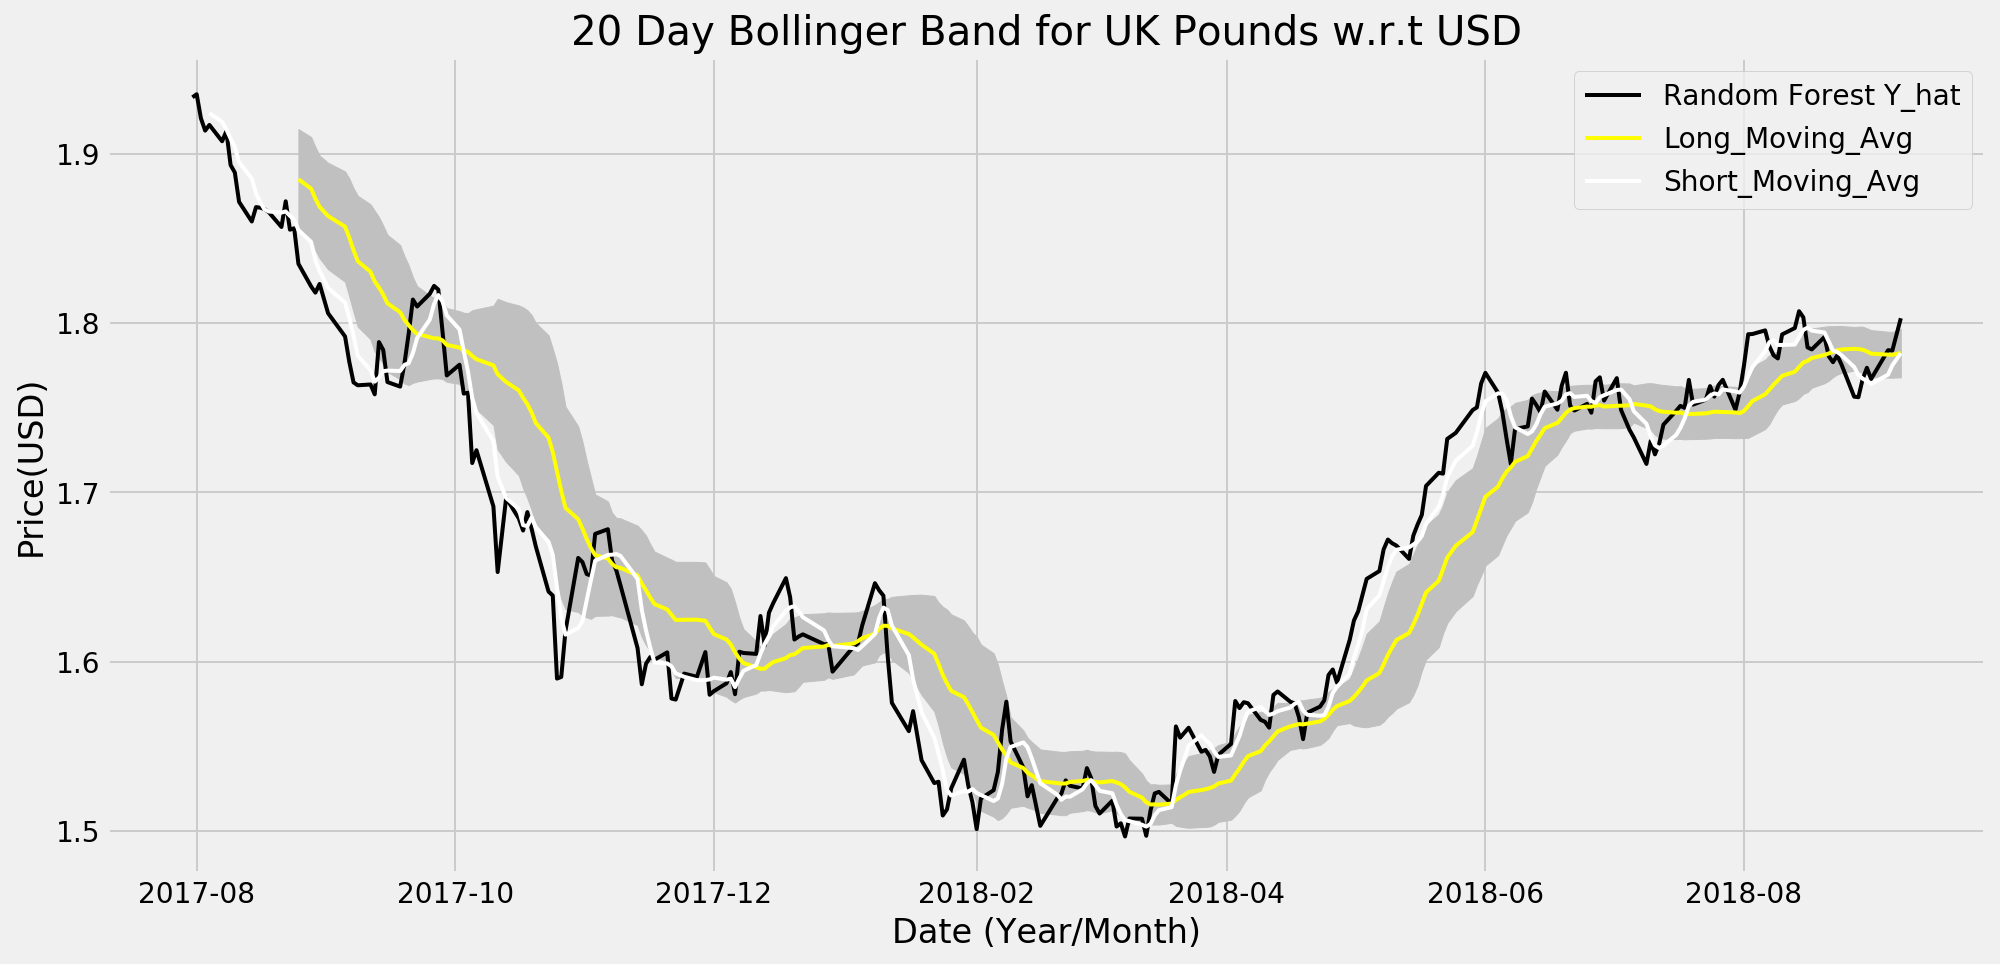

In [84]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)
x_axis = lowest_Y_hat_bst_avg.index.get_level_values(0)
ax.fill_between(x_axis, lowest_Y_hat_bst_avg['Long_Upper_Band'], lowest_Y_hat_bst_avg['Long_Lower_Band'], color='silver')
ax.plot(x_axis, lowest_Y_hat_bst_avg['rf_y_hat'], color='black', label = 'Random Forest Y_hat',lw=2)
ax.plot(x_axis, lowest_Y_hat_bst_avg['Long_Moving_Avg'], color='yellow', lw=2)
ax.plot(x_axis, lowest_Y_hat_bst_avg['Short_Moving_Avg'], color='white', lw=2)

ax.set_title('20 Day Bollinger Band for UK Pounds w.r.t USD')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()